In [1]:
import pathlib
import numpy as np
import scipy as sp
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.patches
import mplstereonet
import skimage.exposure
import harmonica as hm
import verde as vd

import zipfile
import os
from matplotlib.image import imread

import time
import warnings
import rich.progress

In [2]:
fig_dir = pathlib.Path("..") / "paper" / "figures"

file selected: NRM1.mat
file selected: NRM4.mat


/tmp/ipykernel_196974/302742711.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


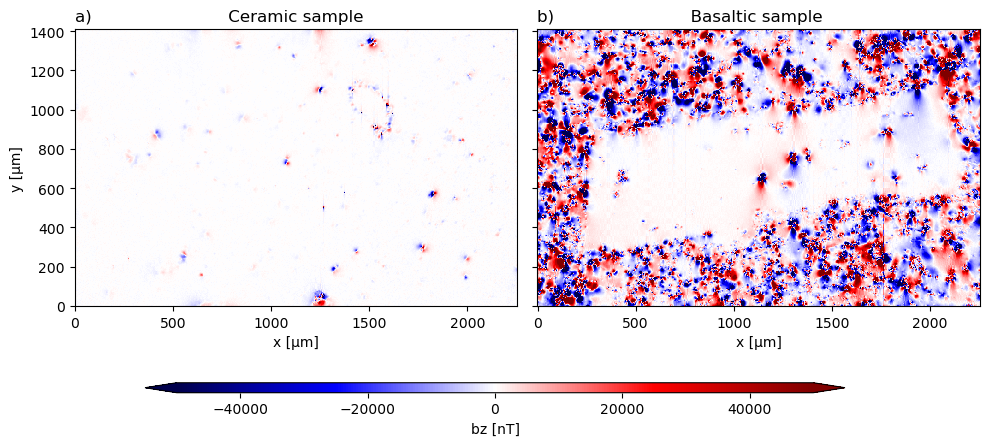

In [3]:
from basalt_sample import micromag as mg

# Lista com os nomes das pastas contendo os arquivos .mat
folders = ["ceramic_sample/real-data", 
           "basalt_sample/real-data"]
titles = ["a)                          Ceramic sample", 
          "b)                          Basaltic sample"]

# Criar figura para os subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
images = []

res = 2.35  # Resolução espacial em µm/pixel

for i, (folder, title) in enumerate(zip(folders, titles)):
    # Procurar arquivos .mat dentro da pasta
    # mat_files = [f for f in os.listdir(folder) if f.endswith(".mat")]
    mat_files = ['NRM1.mat', 'NRM4.mat']
    
    if mat_files:
        # Alterando os índices para pegar o 7º e o 5º arquivo
        if i == 0:  # Para o primeiro caso (ceramic_sample)
            mat_path = pathlib.Path(folder) / mat_files[i]
            print(f'file selected: {mat_files[i]}')
        elif i == 1:  # Para o segundo caso (basalt_sample)
            mat_path = pathlib.Path(folder) / mat_files[i]
            print(f'file selected: {mat_files[i]}')
        
        # Carregar o arquivo .mat como um xarray.Dataset
        ds = mg.load_qdm(mat_path)
        
        # Criar coordenadas espaciais com base na resolução
        x = np.arange(ds.bz.shape[1]) * res  # Coordenadas x em µm
        y = np.arange(ds.bz.shape[0]) * res  # Coordenadas y em µm
        
        # Plotar pcolormesh com coordenadas ajustadas
        im = axes[i].pcolormesh(x, y, ds.bz, cmap="seismic", vmax=50000, vmin=-50000)
        axes[i].set_title(title, loc='left')
        images.append(im)

        # Definir aspecto igual
        axes[i].set_aspect('equal')

# Adicionar colorbar compartilhado
if images:
    cbar = fig.colorbar(images[0], ax=axes, extend='both', 
                        orientation='horizontal', fraction=0.09, pad=0.1,
                        cax=fig.add_axes([0.15, 0.05, 0.7, 0.02]))
    cbar.set_label("bz [nT]")

# Definir rótulos dos eixos
axes[0].set_ylabel('y [µm]')
for ax in axes:
    ax.set_xlabel('x [µm]')

# Ajustar layout
plt.tight_layout()

# Salvar a figura
# fig.savefig(fig_dir / "real-data-maps.png", dpi=300, facecolor='w', bbox_inches='tight')

# Exibir a figura
plt.show()


file selected: NRM1.jpg
file selected: NRM4.jpg


/tmp/ipykernel_196974/3007154549.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


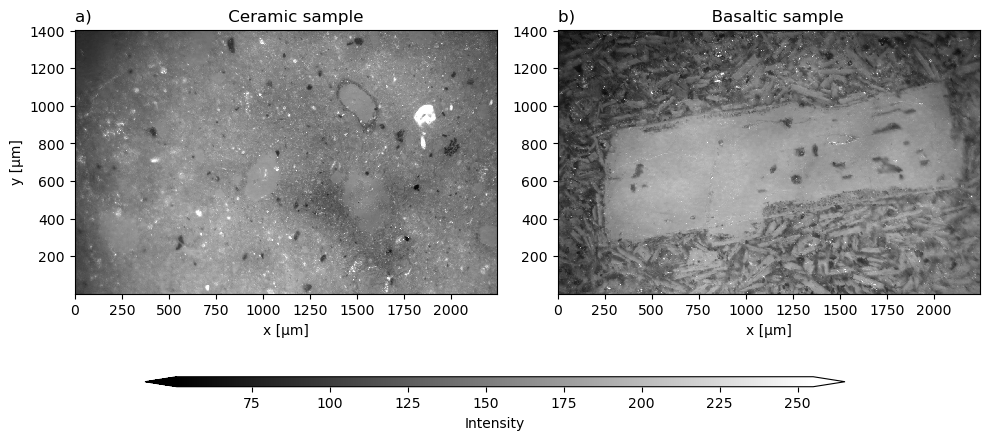

In [4]:
# Lista com os nomes das pastas contendo os arquivos .jpeg
folders = ["ceramic_sample/LED_images", 
           "basalt_sample/LED_images"]
titles = ["a)                          Ceramic sample", 
          "b)                          Basaltic sample"]

# Criar figura para os subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=False)
images = []

res = 1.17  # Resolução espacial em µm/pixel

for i, (folder, title) in enumerate(zip(folders, titles)):
    # Procurar arquivos .jpeg dentro da pasta
    # jpeg_files = [f for f in os.listdir(folder) if f.endswith(".jpg")]
    jpeg_files = ['NRM1.jpg', 'NRM4.jpg']
    
    if jpeg_files:
        # Alterando os índices para pegar o 7º e o 5º arquivo
        if i == 0:  # Para o primeiro caso (ceramic_sample)
            img_path = pathlib.Path(folder) / jpeg_files[i]
            print(f'file selected: {jpeg_files[i]}')
        elif i == 1:  # Para o segundo caso (basalt_sample)
            img_path = pathlib.Path(folder) / jpeg_files[i]
            print(f'file selected: {jpeg_files[i]}')
        
        # Carregar a imagem como array numpy
        img = imread(img_path)
        
        # Criar coordenadas espaciais com base na resolução
        x = np.arange(img.shape[1]) * res  # Coordenadas x em µm
        y = abs(np.arange(-img.shape[0], 0)) * res  # Coordenadas y em µm
        
        # Plotar pcolormesh com coordenadas ajustadas
        im = axes[i].pcolormesh(x, y, img, cmap="gray")
        axes[i].set_title(title, loc='left')
        images.append(im)

        # Definir aspecto igual
        axes[i].set_aspect('equal')
        # axes[i].invert_yaxis()
        # axes[i].invert_xaxis()

# Adicionar colorbar compartilhado
if images:
    cbar = fig.colorbar(images[0], ax=axes, extend='both', 
                        orientation='horizontal', fraction=0.09, pad=0.1,
                        cax=fig.add_axes([0.15, 0.05, 0.7, 0.02]))
    cbar.set_label("Intensity")

# Definir rótulos dos eixos
axes[0].set_ylabel('y [µm]')
for ax in axes:
    ax.set_xlabel('x [µm]')

# Ajustar layout
plt.tight_layout()


# Exibir a figura
plt.show()

/tmp/ipykernel_196974/3895155207.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


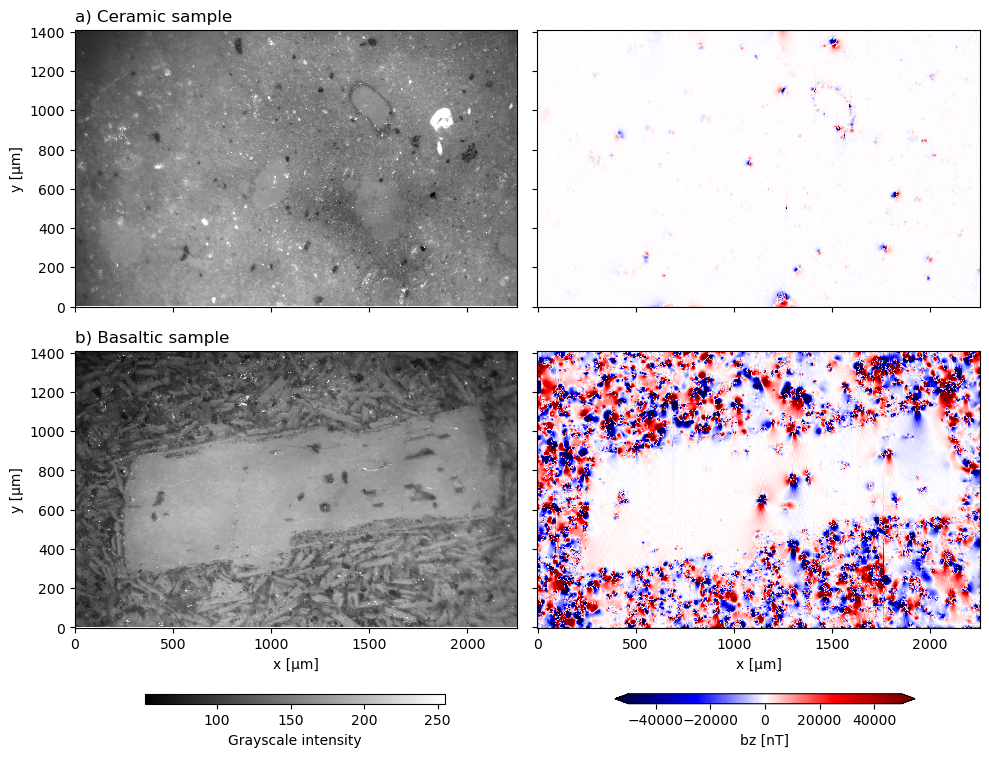

In [5]:
folders_jpg = ["ceramic_sample/LED_images", "basalt_sample/LED_images"]
folders_mat = ["ceramic_sample/real-data", "basalt_sample/real-data"]
jpeg_files = ['NRM1.jpg', 'NRM4.jpg']
mat_files = ['NRM1.mat', 'NRM4.mat']
titles = ["a) Ceramic sample", "b) Basaltic sample"]


# Criar figura para os subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex='col', sharey='row')
images_jpg = []
images_mat = []

# Resoluções espaciais
res_jpg = 2.35 / 2  # µm/pixel
res_mat = 2.35  # µm/pixel

for i, (jpg_folder, mat_folder, title) in enumerate(zip(folders_jpg, folders_mat, titles)):
    # Processar imagem JPEG
    img_path = pathlib.Path(jpg_folder) / jpeg_files[i]
    img = imread(img_path)
    x_jpg = np.arange(img.shape[1]) * res_jpg
    y_jpg = abs(np.arange(-img.shape[0], 0)) * res_jpg
    im_jpg = axes[i, 0].pcolormesh(x_jpg, y_jpg, img, cmap="gray")
    axes[i, 0].set_title(title, loc='left')
    axes[i, 0].set_aspect('equal')
    images_jpg.append(im_jpg)

    # Processar arquivo .mat
    mat_path = pathlib.Path(mat_folder) / mat_files[i]
    ds = mg.load_qdm(mat_path)
    x_mat = np.arange(ds.bz.shape[1]) * res_mat
    y_mat = np.arange(ds.bz.shape[0]) * res_mat
    im_mat = axes[i, 1].pcolormesh(x_mat, y_mat, ds.bz, cmap="seismic", vmax=50000, vmin=-50000)
    axes[i, 1].set_aspect('equal')
    images_mat.append(im_mat)

# Ajustar espaço entre linhas
plt.subplots_adjust(hspace=-0.7)

# Criar e posicionar manualmente as colorbars
cax_jpg = fig.add_axes([0.15, 0.125, 0.3, 0.01])  # [left, bottom, width, height]
cax_mat = fig.add_axes([0.62, 0.125, 0.3, 0.01])  

# Adicionar colorbar para imagens JPEG (níveis de cinza)
cbar_jpg = fig.colorbar(images_jpg[0], cax=cax_jpg, orientation='horizontal')
cbar_jpg.set_label("Grayscale intensity")

# Adicionar colorbar para mapas .mat (campo magnético)
cbar_mat = fig.colorbar(images_mat[0], cax=cax_mat, extend='both', orientation='horizontal')
cbar_mat.set_label("bz [nT]")

# Definir rótulos dos eixos
axes[0, 0].set_ylabel('y [µm]')
axes[1, 0].set_ylabel('y [µm]')
for ax in axes[-1, :]:
    ax.set_xlabel('x [µm]')

# Ajustar layout
plt.tight_layout()
fig.savefig(fig_dir / "real-data-maps.png", dpi=300, facecolor='w', bbox_inches='tight')
# Exibir a figura
plt.show()


/tmp/ipykernel_196974/1857185002.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


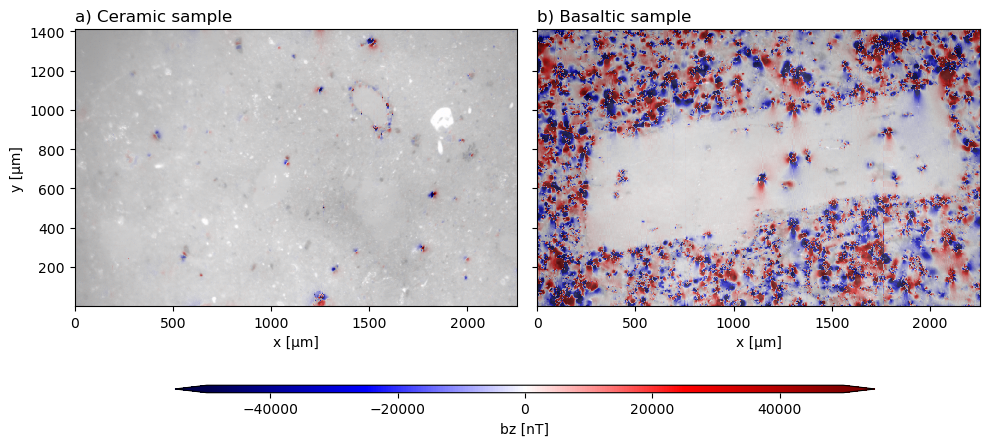

In [6]:
folders_jpg = ["ceramic_sample/LED_images", "basalt_sample/LED_images"]
folders_mat = ["ceramic_sample/real-data", "basalt_sample/real-data"]
jpeg_files = ['NRM1.jpg', 'NRM4.jpg']
mat_files = ['NRM1.mat', 'NRM4.mat']
titles = ["a) Ceramic sample", "b) Basaltic sample"]

# Criar figura para os subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex='col', sharey='row')

# Resoluções espaciais
res_jpg = 2.35 / 2  # µm/pixel
res_mat = 2.35  # µm/pixel

for i, (jpg_folder, mat_folder, title) in enumerate(zip(folders_jpg, folders_mat, titles)):
    # Processar arquivo .mat
    mat_path = pathlib.Path(mat_folder) / mat_files[i]
    ds = mg.load_qdm(mat_path)
    x_mat = np.arange(ds.bz.shape[1]) * res_mat
    y_mat = np.arange(ds.bz.shape[0]) * res_mat
    im_mat = axes[i].pcolormesh(x_mat, y_mat, ds.bz, cmap="seismic", vmax=50000, vmin=-50000)
    axes[i].set_aspect('equal')
    axes[i].set_title(title, loc='left')
    
    # Processar imagem JPEG e sobrepor com transparência
    img_path = pathlib.Path(jpg_folder) / jpeg_files[i]
    img = imread(img_path)
    x_jpg = np.arange(img.shape[1]) * res_jpg
    y_jpg = abs(np.arange(-img.shape[0], 0)) * res_jpg
    axes[i].imshow(img, cmap="gray", extent=[x_jpg.min(), x_jpg.max(), y_jpg.min(), y_jpg.max()], 
                   alpha=0.45, zorder=1)

cax_mat = fig.add_axes([0.18, 0.05, 0.7, 0.015])  
# Adicionar colorbar para mapas .mat (campo magnético)
cbar_mat = fig.colorbar(im_mat, cax=cax_mat, extend='both', orientation='horizontal')
cbar_mat.set_label("bz [nT]")

# Definir rótulos dos eixos
for ax in axes:
    ax.set_xlabel('x [µm]')
axes[0].set_ylabel('y [µm]')

# Ajustar layout
plt.tight_layout()
plt.show()